In [50]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('extreme_pollution.csv', sep=None, engine='python')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7671 entries, 0 to 7670
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            7671 non-null   int64  
 1   period        7671 non-null   object 
 2   subject       7671 non-null   object 
 3   municipality  7324 non-null   object 
 4   settlement    7510 non-null   object 
 5   oktmo         7324 non-null   float64
 6   water_body    7671 non-null   object 
 7   indicator     7671 non-null   object 
 8   hazard_class  5133 non-null   object 
 9   cnt_cases     7671 non-null   int64  
 10  value_min     7670 non-null   float64
 11  value_max     7670 non-null   float64
 12  unit          7671 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 779.2+ KB


In [51]:
df.head()

,id,period,subject,municipality,settlement,oktmo,water_body,indicator,hazard_class,cnt_cases,value_min,value_max,unit
0,1,2008-01-31,Камчатский край,Усть-Камчатский район,п. Козыревск,3.061941e+10,р. Камчатка,Кадмий,2,1,6.0,6.0,ПДК
1,2,2008-01-31,Курганская область,Курган,г. Курган,3.770100e+10,вдхр. Курганское,Марганец,4,1,60.0,60.0,ПДК
2,3,2008-01-31,Московская область,Королёв,г. Королев,4.673400e+10,"ручей, впадающий в реку Клязьму",Нефть и нефтепродукты,3,8,71.0,100.0,ПДК
3,4,2008-01-31,Мурманская область,Печенгский муниципальный район,пгт. Никель,4.751500e+10,р. Колос-Йоки,Никель,3,1,60.0,60.0,ПДК
4,5,2008-01-31,Мурманская область,Городской округ город Мончегорск с подведомств...,г. Мончегорск,4.771500e+10,р. Нюдуай,Водородный показатель (pH),NaN,1,9.9,9.9,pH


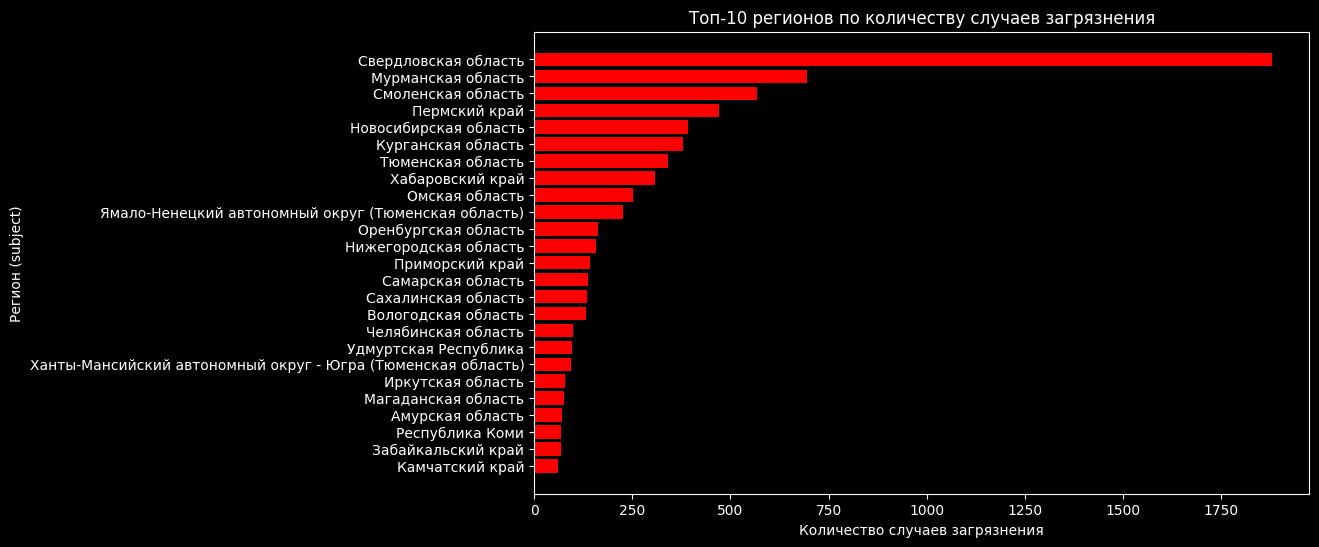

In [52]:
# --- 1. СТОЛБЧАТАЯ ДИАГРАММА (barh) ---
top_subjects = df.groupby("subject")["cnt_cases"].sum().sort_values(ascending=False).head(25)

plt.figure(figsize=(10, 6))
plt.barh(top_subjects.index, top_subjects.values, color='red')
plt.xlabel("Количество случаев загрязнения")
plt.ylabel("Регион (subject)")
plt.title("Топ-10 регионов по количеству случаев загрязнения")
plt.gca().invert_yaxis()
plt.show()

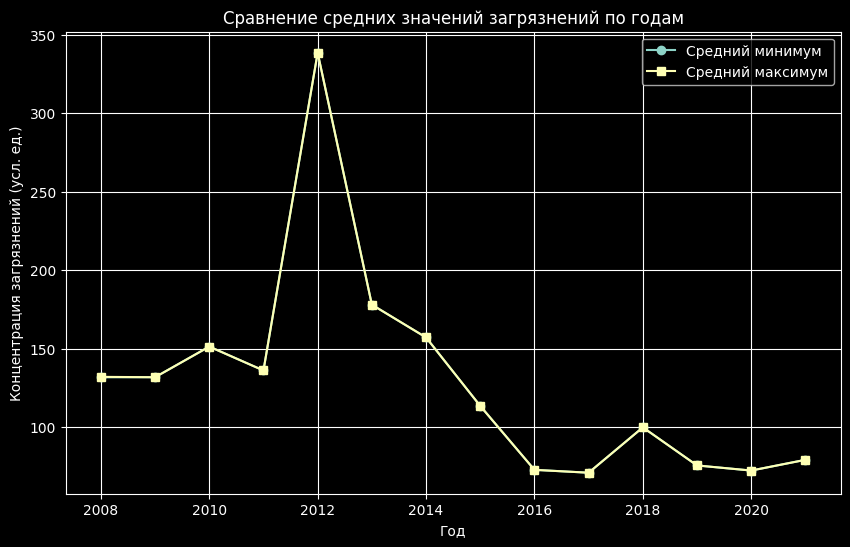

In [55]:
df["period"] = pd.to_datetime(df["period"])
yearly_data = df.groupby(df["period"].dt.year)[["value_min", "value_max"]].mean().dropna()
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data["value_min"], label="Средний минимум", marker='o')
plt.plot(yearly_data.index, yearly_data["value_max"], label="Средний максимум", marker='s')
plt.title("Сравнение средних значений загрязнений по годам")
plt.xlabel("Год")
plt.ylabel("Концентрация загрязнений (усл. ед.)")
plt.legend()
plt.grid(True)
plt.show()

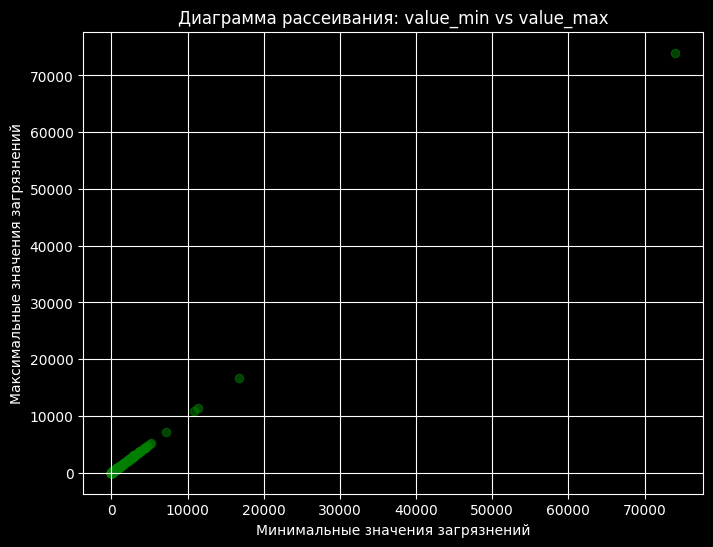

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(df["value_min"], df["value_max"], alpha=0.5, color='green')
plt.title("Диаграмма рассеивания: value_min vs value_max")
plt.xlabel("Минимальные значения загрязнений")
plt.ylabel("Максимальные значения загрязнений")
plt.grid(True)
plt.show()